In [ ]:
# Taller

# 1
Del conjunto de datos de Temperatura, realice la selección de una provincia y realice la estimación de la densidad. Para esta estimación considere:

### a. Tabla de frecuencias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [4]:
df = pd.read_excel("data\\Temperaturas.xlsx", sheet_name = 'Hoja3')

In [5]:
df.head(2)

,ano1,mes2,dia3,fecha4,alava5,albacete6,alicante7,almeria8,avila9,badajoz10,...,sevilla47,soria48,tarragona49,teruel50,toledo51,valladolid52,valencia53,vizcaya54,zamora55,zaragoza56
0,1990,1,1,1990-01-01,25,22,14,15,29,19,...,18,29,20,23,25,27,18,20,25,26
1,1990,1,2,1990-01-02,26,25,14,14,33,21,...,20,30,16,23,27,29,17,18,31,22


In [9]:
df_ciudad = df[['alava5']]

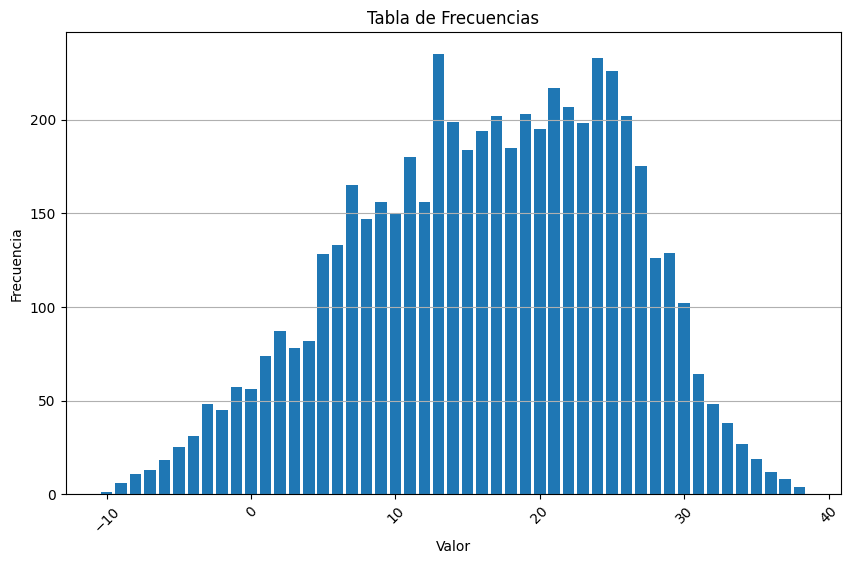

In [14]:
# Suponiendo que 'df' es tu DataFrame y 'columna_de_interes' es la columna de interés
tabla_frecuencias = df['alava5'].value_counts()

# Convertir la serie de frecuencias en un DataFrame para facilitar el trazado
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

# Trazar el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(tabla_frecuencias_df['Valor'], tabla_frecuencias_df['Frecuencia'])
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.title('Tabla de Frecuencias')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')  # Mostrar rejilla solo en el eje y
plt.show()